In [7]:
from openfermion import QubitOperator

# We define function in order to change p and q into qubit representation (Pauli Operator (I - Z)/ 2)
def prime_bit_operator(qubit_index):
    return 0.5 * QubitOperator(()) - 0.5 * QubitOperator(((qubit_index, 'Z')))


# 1 means least significant bit (LSB), 2 - q1, 4 - q2 .... all in binary representation but already modificated into quantum computing
# Numbers in function doesn't really matter, they are arbitrary in ascending order - we should focus on bit quantity (q0,q1,q2....)
p_op = 1*prime_bit_operator(0) + 2*prime_bit_operator(1) + 4*prime_bit_operator(2) + 8*prime_bit_operator(3) + 16*prime_bit_operator(4) + 32*prime_bit_operator(5)
q_op = 1*prime_bit_operator(6) + 2*prime_bit_operator(7) 
n_op = 123 * QubitOperator(()) # Qubit operator(()) means idetity gate (we don't need to change representation for n, because we don't search it)
# Hamiltonian as a cost function
Hcost =  (n_op - (p_op * q_op))**2

#print("Cost function in qubit representation: ")
#print(cost)
#qubit_hamiltonian =  cost
A = 100 # Size of punishment

p0_op = prime_bit_operator(0)   
q0_op = prime_bit_operator(6)

#p3_op = prime_bit_operator(3)
#p1_op = prime_bit_operator(1)
#p2_op = prime_bit_operator(2)

Hp = QubitOperator(()) - p0_op 
Hq = QubitOperator(()) - q0_op 
#H9 = p0_op * (QubitOperator(()) - p1_op) * (QubitOperator(()) - p2_op) * p3_op #9 = 1001
#H15 = p0_op * p1_op * p2_op * p3_op #15 = 1111

cost = Hcost + A * (Hp + Hq)

qubit_hamiltonian = cost
print(qubit_hamiltonian)

8272.75 [] +
124.25 [Z0] +
3.5 [Z0 Z1] +
-1.5 [Z0 Z1 Z6] +
1.0 [Z0 Z1 Z6 Z7] +
-3.0 [Z0 Z1 Z7] +
7.0 [Z0 Z2] +
-3.0 [Z0 Z2 Z6] +
2.0 [Z0 Z2 Z6 Z7] +
-6.0 [Z0 Z2 Z7] +
14.0 [Z0 Z3] +
-6.0 [Z0 Z3 Z6] +
4.0 [Z0 Z3 Z6 Z7] +
-12.0 [Z0 Z3 Z7] +
28.0 [Z0 Z4] +
-12.0 [Z0 Z4 Z6] +
8.0 [Z0 Z4 Z6 Z7] +
-24.0 [Z0 Z4 Z7] +
56.0 [Z0 Z5] +
-24.0 [Z0 Z5 Z6] +
16.0 [Z0 Z5 Z6 Z7] +
-48.0 [Z0 Z5 Z7] +
-14.25 [Z0 Z6] +
-31.5 [Z0 Z6 Z7] +
-28.5 [Z0 Z7] +
148.5 [Z1] +
14.0 [Z1 Z2] +
-6.0 [Z1 Z2 Z6] +
4.0 [Z1 Z2 Z6 Z7] +
-12.0 [Z1 Z2 Z7] +
28.0 [Z1 Z3] +
-12.0 [Z1 Z3 Z6] +
8.0 [Z1 Z3 Z6 Z7] +
-24.0 [Z1 Z3 Z7] +
56.0 [Z1 Z4] +
-24.0 [Z1 Z4 Z6] +
16.0 [Z1 Z4 Z6 Z7] +
-48.0 [Z1 Z4 Z7] +
112.0 [Z1 Z5] +
-48.0 [Z1 Z5 Z6] +
32.0 [Z1 Z5 Z6 Z7] +
-96.0 [Z1 Z5 Z7] +
-28.5 [Z1 Z6] +
-63.0 [Z1 Z6 Z7] +
-57.0 [Z1 Z7] +
297.0 [Z2] +
56.0 [Z2 Z3] +
-24.0 [Z2 Z3 Z6] +
16.0 [Z2 Z3 Z6 Z7] +
-48.0 [Z2 Z3 Z7] +
112.0 [Z2 Z4] +
-48.0 [Z2 Z4 Z6] +
32.0 [Z2 Z4 Z6 Z7] +
-96.0 [Z2 Z4 Z7] +
224.0 [Z2 Z5] +
-96.0 [Z2 Z5 Z6] +
64.0 [Z

In [8]:
from qiskit.quantum_info import SparsePauliOp
# Change from QubitOperator to SparsePauliOP
def convert_qubitop_to_sparsepauliop(qubit_op: QubitOperator) -> SparsePauliOp:
    # Point out number of qubits from the biggest index from operators
    n_qubits = 0
    for term in qubit_op.terms.keys(): # Going for terms (with Pauli operators) in QubitOperator object
        if term:
            max_index = max(index for index, _ in term) 
            n_qubits = max(n_qubits, max_index + 1) # Minimal number of qubits needed to map an operator
    if n_qubits == 0:
        n_qubits = 1
    pauli_list = []
    coeffs = []
    for term, coeff in qubit_op.terms.items():
        pauli_str = ['I'] * n_qubits  # String of Pauli operators with qubit lenght 
        for index, pauli in term:
            pauli_str[index] = pauli # Changing from I to X,Y,Z
        pauli_label = ''.join(pauli_str[::-1]) # Qiskit uses reverse convertion for qubit indexes 
        pauli_list.append(pauli_label)
        coeffs.append(complex(coeff))

    return SparsePauliOp.from_list(list(zip(pauli_list, coeffs)))
qiskit_hamiltonian = convert_qubitop_to_sparsepauliop(qubit_hamiltonian)

print("Qiskit version Hamiltonian: ")
print(qiskit_hamiltonian)

Qiskit version Hamiltonian: 
SparsePauliOp(['IIIIIIII', 'IZIIIIII', 'ZIIIIIII', 'IIIIIIIZ', 'IZIIIIIZ', 'ZIIIIIIZ', 'IIIIIIZI', 'IZIIIIZI', 'ZIIIIIZI', 'IIIIIZII', 'IZIIIZII', 'ZIIIIZII', 'IIIIZIII', 'IZIIZIII', 'ZIIIZIII', 'IIIZIIII', 'IZIZIIII', 'ZIIZIIII', 'IIZIIIII', 'IZZIIIII', 'ZIZIIIII', 'ZZIIIIII', 'ZZIIIIIZ', 'ZZIIIIZI', 'ZZIIIZII', 'ZZIIZIII', 'ZZIZIIII', 'ZZZIIIII', 'IIIIIIZZ', 'IZIIIIZZ', 'ZIIIIIZZ', 'IIIIIZIZ', 'IZIIIZIZ', 'ZIIIIZIZ', 'IIIIZIIZ', 'IZIIZIIZ', 'ZIIIZIIZ', 'IIIZIIIZ', 'IZIZIIIZ', 'ZIIZIIIZ', 'IIZIIIIZ', 'IZZIIIIZ', 'ZIZIIIIZ', 'ZZIIIIZZ', 'ZZIIIZIZ', 'ZZIIZIIZ', 'ZZIZIIIZ', 'ZZZIIIIZ', 'IIIIIZZI', 'IZIIIZZI', 'ZIIIIZZI', 'IIIIZIZI', 'IZIIZIZI', 'ZIIIZIZI', 'IIIZIIZI', 'IZIZIIZI', 'ZIIZIIZI', 'IIZIIIZI', 'IZZIIIZI', 'ZIZIIIZI', 'ZZIIIZZI', 'ZZIIZIZI', 'ZZIZIIZI', 'ZZZIIIZI', 'IIIIZZII', 'IZIIZZII', 'ZIIIZZII', 'IIIZIZII', 'IZIZIZII', 'ZIIZIZII', 'IIZIIZII', 'IZZIIZII', 'ZIZIIZII', 'ZZIIZZII', 'ZZIZIZII', 'ZZZIIZII', 'IIIZZIII', 'IZIZZIII', 'ZIIZZIII', 'IIZIZII

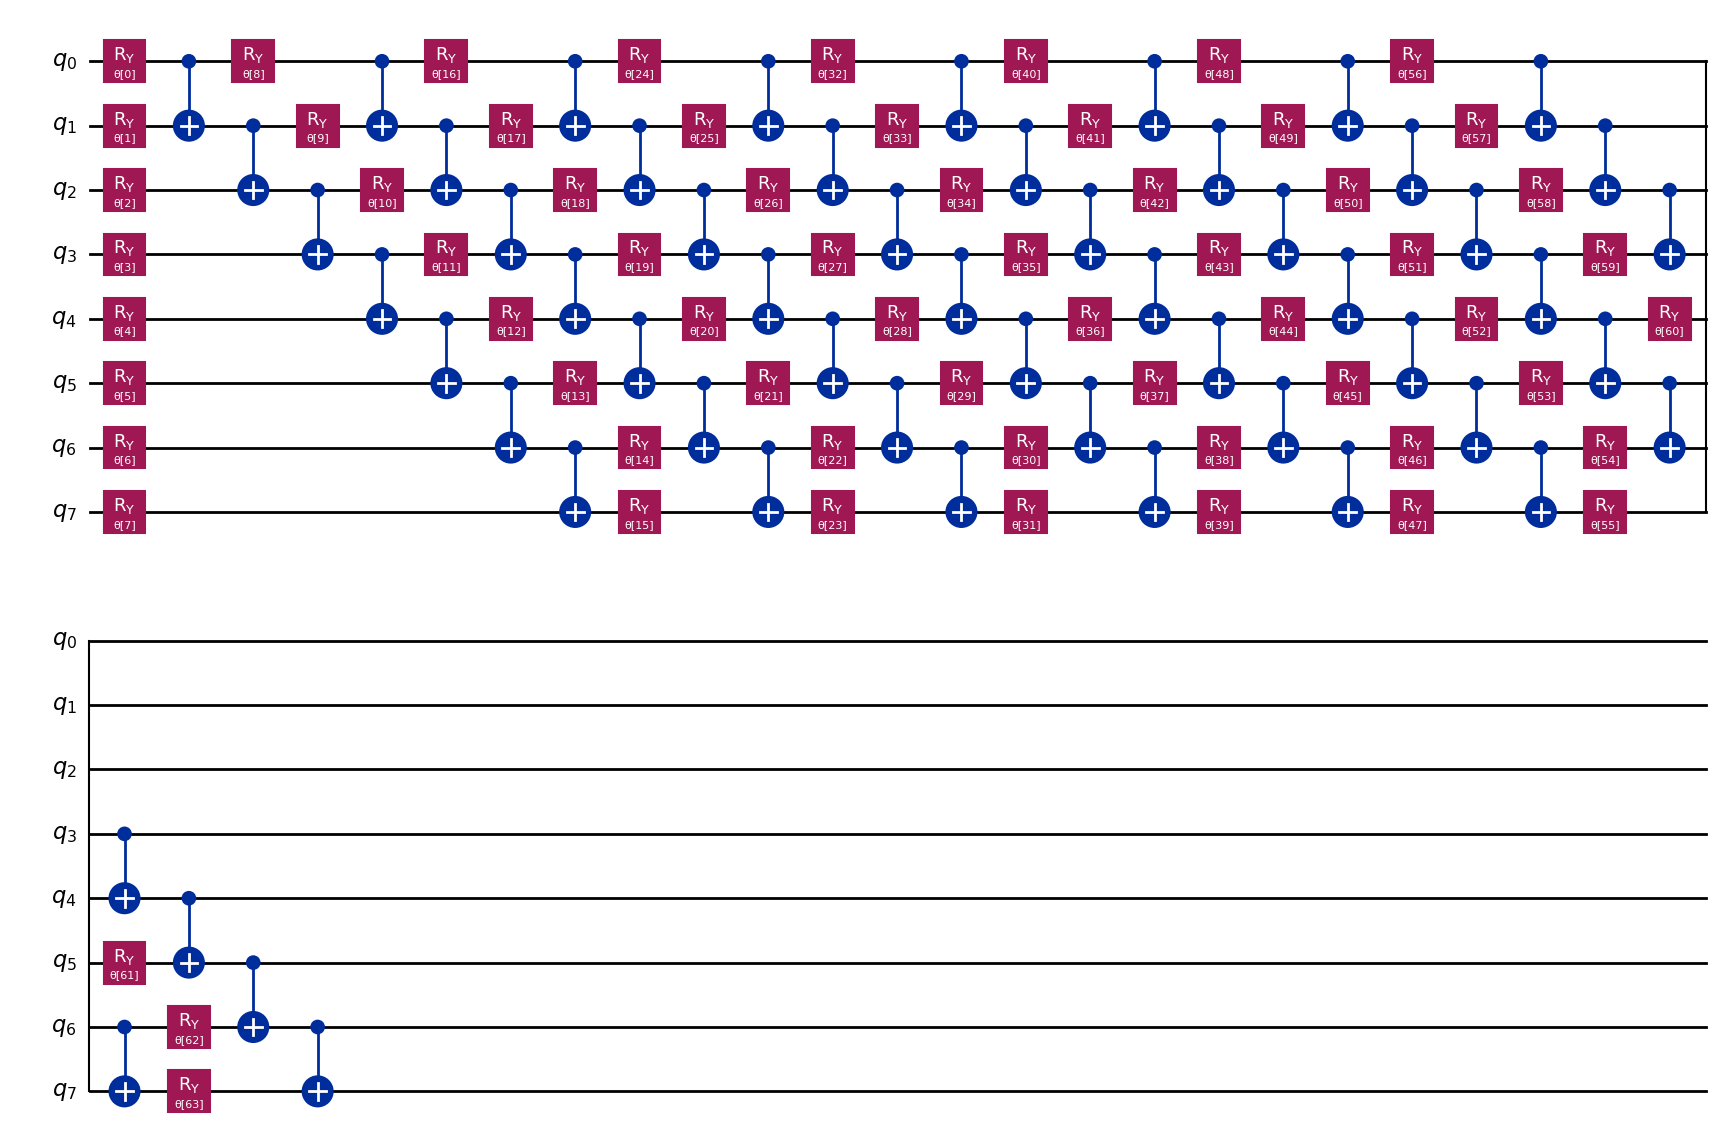

In [9]:
from qiskit.circuit import ParameterVector
from qiskit import QuantumCircuit

#Creating standard ansatz  (random 17 theta parameters)
n_qubits = 8
n_layers = 8
n_params = n_qubits * n_layers  

params = ParameterVector('θ', n_params)

ansatz = QuantumCircuit(n_qubits)
param_idx = 0

for i in range(n_layers):
    for q in range(n_qubits):
        ansatz.ry(params[param_idx], q)
        param_idx += 1
    for q in range(n_qubits - 1):
        ansatz.cx(q, q+1)

ansatz.draw(output='mpl')

Below You can see implementation with VQE-CVaR

In [10]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import EstimatorV2
from qiskit_aer import AerSimulator
from qiskit.primitives import StatevectorEstimator
from qiskit import transpile
from qiskit_ibm_runtime import EstimatorOptions


energies = []
energy_better = []
backend = AerSimulator(method='matrix_product_state')
#backend = Aer.get_backend('aer_simulator')
ansatz_tr = transpile(ansatz, backend) #optimization_level=3
estimator = StatevectorEstimator()
options = EstimatorOptions()
estimator2= EstimatorV2(mode=backend)   #options={"shots": 1000}


alpha = 0.01

def cvar(energies, alpha):
    sorted_energy = np.sort(energies) # We have to sort our results
    cutoff = int(np.ceil(10000 * alpha)) # len(sorted_energy) * alpha in ceil (len(sorted_energy) is actually shots number)
    return sorted_energy[:cutoff].mean()

#Creating the cost function, which computes state energy for given set of parametres for x0 circuit
def cost_func_vqe(parameters, ansatz_tr, qiskit_hamiltonian, estimator):
    bound_ansatz = ansatz_tr.assign_parameters(parameters) 
    estimator_result = estimator.run([(bound_ansatz, qiskit_hamiltonian)]).result()
    energy = estimator_result[0].data.evs
    energies.append(energy)
    energy_better1 = cvar(energies, alpha)
    energy_better.append(energy_better1)
    print(f"Energy: {energy_better1}")
    return energy_better1

x0 = 2 * np.pi * np.random.random(ansatz.num_parameters) # Random vector containing initial parameters from range [0, 2*pi]
result = minimize(cost_func_vqe, x0, args=(ansatz_tr, qiskit_hamiltonian, estimator),  method = "COBYLA", options={'maxiter': 100000}) # Optimizing algorithm (here COBYLA)

plt.plot(energy_better)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.show()

Energy: 8349.300958471624
Energy: 8481.146298275806
Energy: 8377.526045715926
Energy: 8228.473498589203
Energy: 8059.70871538348
Energy: 7948.902755645868
Energy: 7969.093167864206
Energy: 7965.506290441877
Energy: 7894.6996784541925
Energy: 7841.007156397172
Energy: 7798.531210407917
Energy: 7787.063794632452
Energy: 7780.9881713175355
Energy: 7763.7230768163645
Energy: 7743.384890685061
Energy: 7714.053082194348
Energy: 7689.830409983529
Energy: 7698.756182758281
Energy: 7712.601553195382
Energy: 7699.6869931936035
Energy: 7699.906168554344
Energy: 7704.578566457658
Energy: 7705.517672805833
Energy: 7725.953709463101
Energy: 7697.459158959103
Energy: 7712.565252538825
Energy: 7722.501009802779
Energy: 7739.172893256231
Energy: 7727.235956589494
Energy: 7723.091681384261
Energy: 7712.991722191889
Energy: 7688.289577412272
Energy: 7665.285636326364
Energy: 7653.554947424561
Energy: 7652.659332378918
Energy: 7666.469288369432
Energy: 7676.842294935497
Energy: 7681.887838319955
Energy: 7

KeyboardInterrupt: 

In [6]:
print("Optimal VQE energy:", result.fun) 

Optimal VQE energy: 144.00276129411117
